In [152]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df_treino = pd.read_csv("C:/Users/marci/Downloads/playground-series-s4e11/trrain.csv")
df_teste = pd.read_csv("C:/Users/marci/Downloads/playground-series-s4e11/teest.csv")

In [153]:
df_treino.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [154]:
df_treino.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [110]:
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-v0_8')
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

In [111]:
colors_list = [
    '#4682B4',  # cor1: Azul
    '#FFA500',  # cor2: Laranja
    '#4b8078',  # cor3: Verde Escuro
    '#bebada', '#b3de69', '#80b1d3', '#fb8072',
    '#fdb462', '#8dd3c7', '#fccde5', 'burlywood',
    '#bc80bd', '#ccebc5', '#ffed6f', '#c6c6c6'
]


png_path = "./graficos/"

Quantidade de pessoas com depressão entre Janeiro e Junho de 2023. PEsquisa conduzida em várias cidades, abrangendo participantes de várias cidades e profissões. A idade variando entre 18 e 60 anos, os campos são: Gênero, cidade, escolaridade, satisfação no trabalho e estudos, horas de trabalho/estudo, histórico familiar e outros.

Quantidade de pessoas com depressao por horas de trabalho/estudo

In [112]:
pessoas = df_treino['id'].value_counts()
depressao = df_treino['Depression'].value_counts()
HorasTrabalho = df_treino['Work/Study Hours'].value_counts()

In [113]:
grouped = df_treino.groupby('Work/Study Hours')['Depression'].value_counts().unstack(fill_value=0)
grouped.head()

Depression,0,1
Work/Study Hours,,
0.0,11078,988
1.0,9033,769
2.0,9497,1098
3.0,8403,1071
4.0,7853,1212


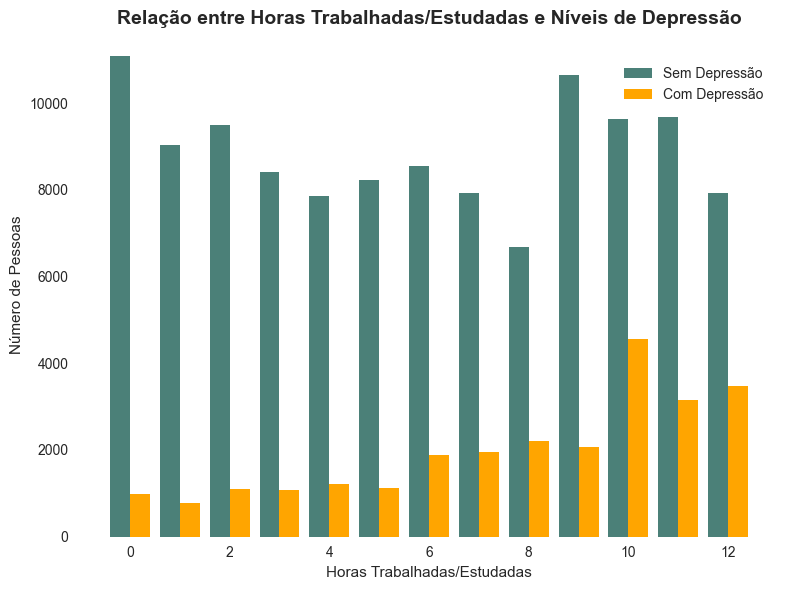

In [114]:
# Agrupar os dados e contar a ocorrência de cada valor de depressão
grouped = df_treino.groupby('Work/Study Hours')['Depression'].value_counts().unstack(fill_value=0)

# Renomear as colunas para melhor legibilidade
grouped.columns = ['No Depression (0)', 'With Depression (1)']

# Configurar o gráfico
fig1, ax = plt.subplots(figsize=(8, 6))

# Criar barras para os níveis de depressão
bars1 = ax.bar(grouped.index - 0.2, grouped['No Depression (0)'], width=0.4,
                label='Sem Depressão ',  color=colors_list[2])
bars2 = ax.bar(grouped.index + 0.2, grouped['With Depression (1)'], width=0.4,
                label='Com Depressão ', color=colors_list[1])

# Configurar rótulos e títulos
ax.set_ylabel('Número de Pessoas')
ax.set_xlabel('Horas Trabalhadas/Estudadas')
ax.set_title('Relação entre Horas Trabalhadas/Estudadas e Níveis de Depressão', fontsize=14, fontweight='bold')

# Adicionar legenda
legend_labels = ['Sem Depressão ', 'Com Depressão ']
legend = ax.legend(
    [bars1[0], bars2[0]], legend_labels,
    title=" ",
    loc="upper right",
    fontsize=10,
    title_fontsize=12,
)

# Melhorar layout
plt.tight_layout()
plt.show()

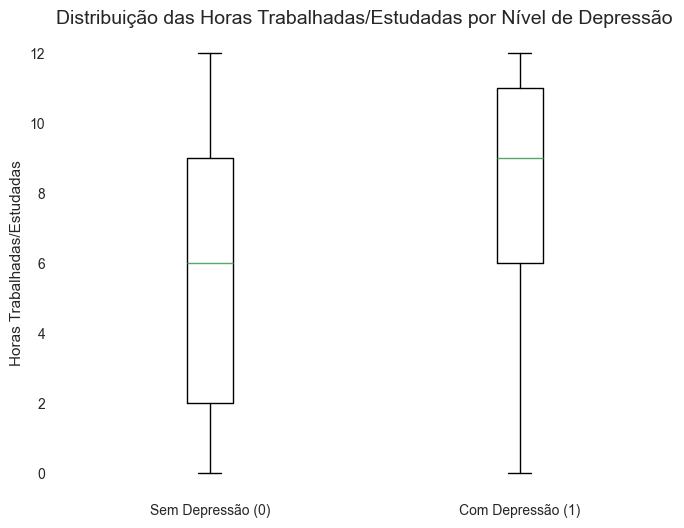

In [115]:
fig2, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([df_treino['Work/Study Hours'][df_treino['Depression'] == 0], 
            df_treino['Work/Study Hours'][df_treino['Depression'] == 1]], 
           labels=['Sem Depressão (0)', 'Com Depressão (1)'])

# Configurar rótulos e título
ax.set_ylabel('Horas Trabalhadas/Estudadas')
ax.set_title('Distribuição das Horas Trabalhadas/Estudadas por Nível de Depressão', fontsize=14)
ax.grid()


# Mostrar o gráfico
plt.show()

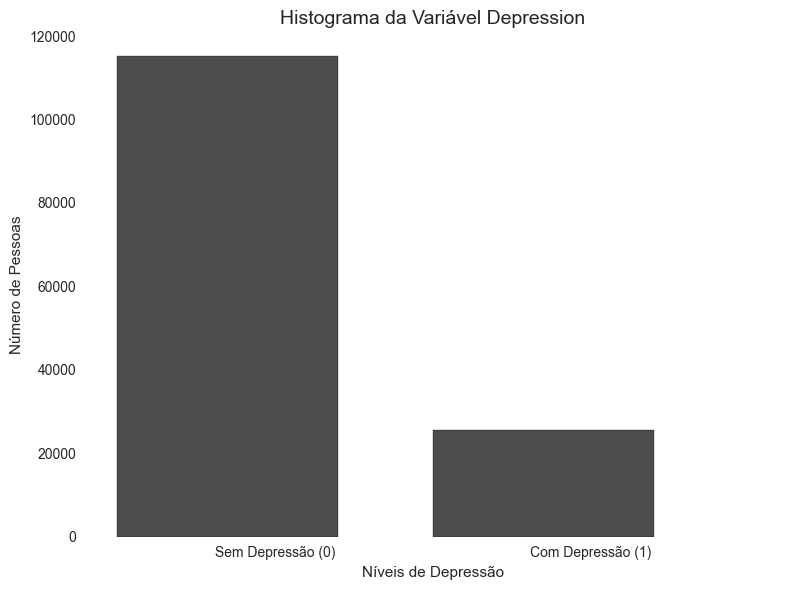

In [116]:
# Criar o histograma
plt.figure(figsize=(8, 6))
plt.hist(df_treino['Depression'], bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7, color='black',width= 0.7)

# Configurar rótulos e título
plt.xticks([0, 1], ['Sem Depressão (0)', 'Com Depressão (1)'])
plt.ylabel('Número de Pessoas')
plt.xlabel('Níveis de Depressão')
plt.title('Histograma da Variável Depression', fontsize=14)

# Mostrar gráfico
plt.grid(axis='y')
plt.tight_layout()
plt.show()

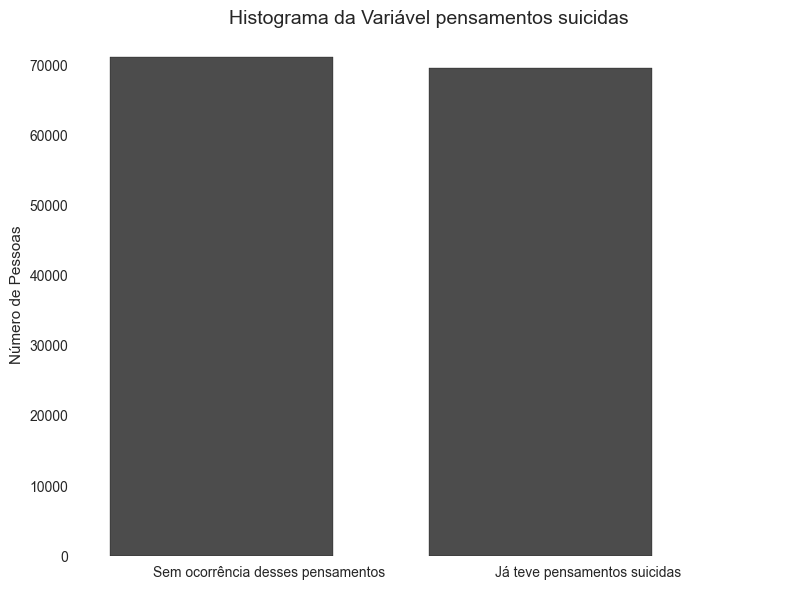

In [117]:
# Criar o histograma
plt.figure(figsize=(8, 6))
plt.hist(df_treino['Have you ever had suicidal thoughts ?'], bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7,width= 0.7, color='black')

# Configurar rótulos e título
plt.xticks(['No', 'Yes'], ['Sem ocorrência desses pensamentos', 'Já teve pensamentos suicidas'])
plt.ylabel('Número de Pessoas')
plt.xlabel('')
plt.title('Histograma da Variável pensamentos suicidas', fontsize=14)

# Mostrar gráfico
plt.grid(axis='y')
plt.tight_layout()
plt.show()

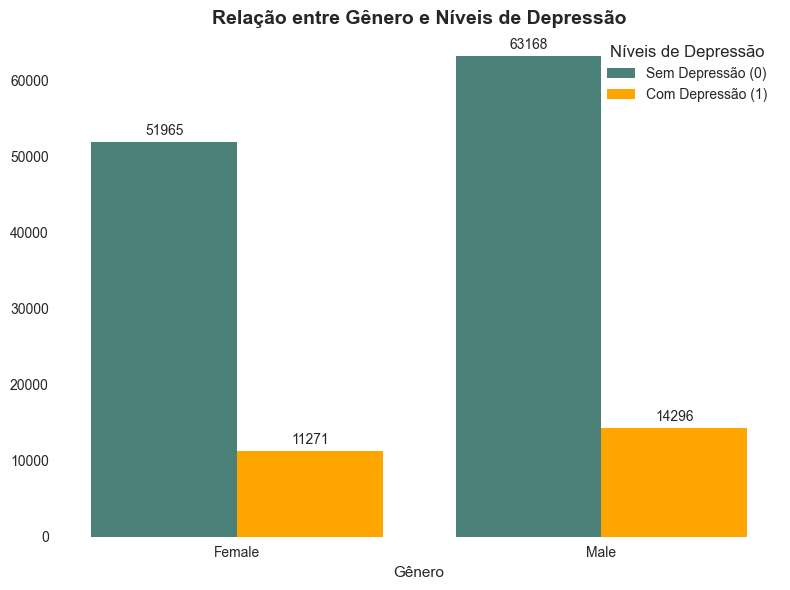

In [118]:
# Agrupar os dados e contar a ocorrência de cada valor de depressão
grouped = df_treino.groupby('Gender')['Depression'].value_counts().unstack(fill_value=0)

# Renomear as colunas para melhor legibilidade
grouped.columns = ['Sem Depressão (0)', 'Com Depressão (1)']
grouped.columns = grouped.columns.str.strip()


# Configurar o gráfico
fig3, ax = plt.subplots(figsize=(8, 6))
# Configuração para barras lado a lado
x = range(len(grouped.index))  # Posições no eixo X
width = 0.4  # Largura das barras

# Criar barras para os níveis de depressão
bars1 = ax.bar([pos - width / 2 for pos in x], grouped['Sem Depressão (0)'], 
               width=width, label='Sem Depressão (0)', color=colors_list[2])
bars2 = ax.bar([pos + width / 2 for pos in x], grouped['Com Depressão (1)'], 
               width=width, label='Com Depressão (1)', color=colors_list[1])


# Configurar rótulos e títulos
ax.set_ylabel('')
ax.set_xlabel('Gênero')
ax.set_title('Relação entre Gênero e Níveis de Depressão', fontsize=14, fontweight='bold')
ax.set_xticks(x)  # Ajusta as posições no eixo X
ax.set_xticklabels(grouped.index)  # Adiciona os rótulos de gênero

# Adicionar legenda
ax.legend(title="Níveis de Depressão", loc="upper right", fontsize=10, title_fontsize=12)

# Adicionar rótulos no topo das barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{height}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5),
            textcoords="offset points",
            ha='center',
            fontsize=10
        )
# Melhorar layout
plt.tight_layout()
plt.show()

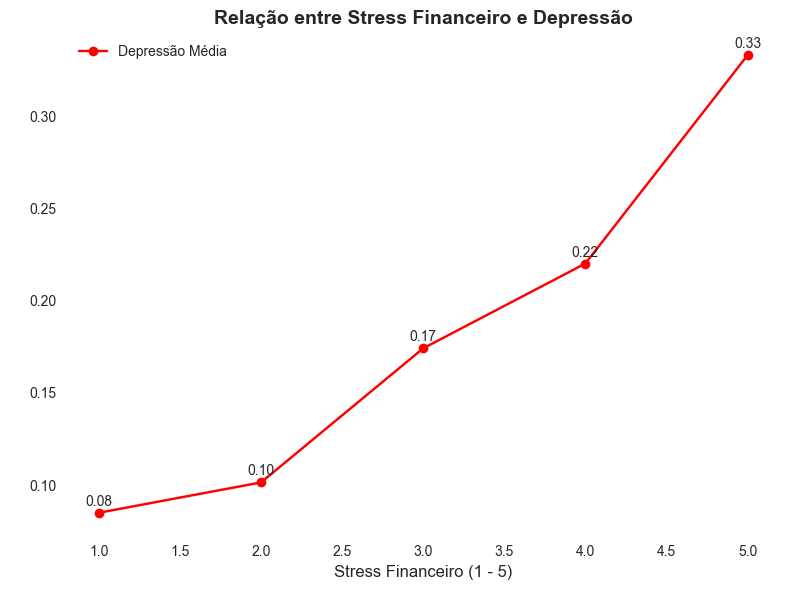

In [119]:
grouped = df_treino.groupby('Financial Stress')['Depression'].mean()

# Criar gráfico de linha
fig4, ax = plt.subplots(figsize=(8, 6))

ax.plot(grouped.index, grouped.values, marker='o', color='red', label='Depressão Média')

# Configurar rótulos e título
ax.set_xlabel('Stress Financeiro (1 - 5)', fontsize=12)
ax.set_ylabel(' ')
#ax.set_yticks(' ')
ax.set_title('Relação entre Stress Financeiro e Depressão', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

# Adicionar valores no gráfico
for x, y in zip(grouped.index, grouped.values):
    ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 5), textcoords="offset points", ha='center', fontsize=10)

# Mostrar legenda
ax.legend()

# Ajustar layout
plt.tight_layout()
plt.show()

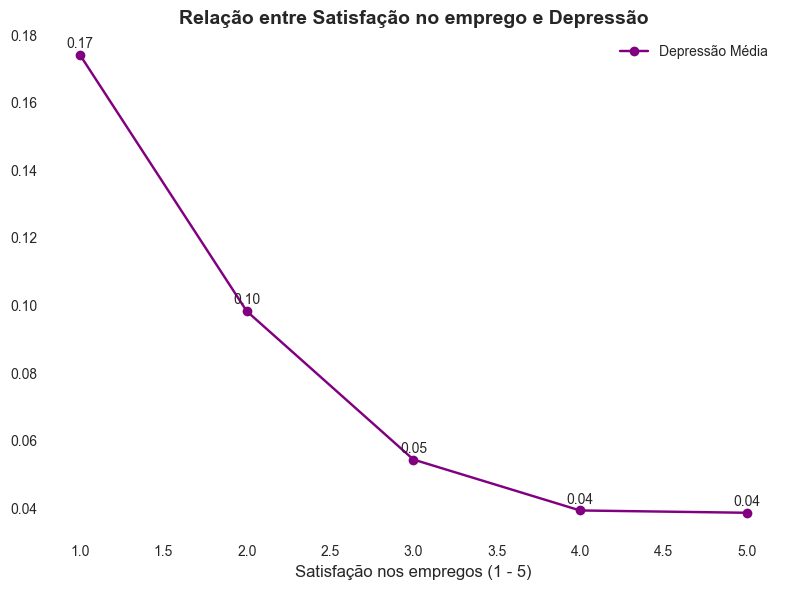

In [120]:
grouped = df_treino.groupby('Job Satisfaction')['Depression'].mean()

# Criar gráfico de linha
fig5, ax = plt.subplots(figsize=(8, 6))

ax.plot(grouped.index, grouped.values, marker='o', color='purple', label='Depressão Média')

# Configurar rótulos e título
ax.set_xlabel('Satisfação nos empregos (1 - 5)', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('Relação entre Satisfação no emprego e Depressão', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

# Adicionar valores no gráfico
for x, y in zip(grouped.index, grouped.values):
    ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 5), textcoords="offset points", ha='center', fontsize=10)

# Mostrar legenda
ax.legend()

# Ajustar layout
plt.tight_layout()
plt.show()

### Feature Engineering, limpar dados, varíaveis categoricas

Classificar todos os valores com uma contagem de valores inferior a 100 para uma nova classe "noise" diferente e preencher os valores NaN para a nova classe ausente.

In [121]:
threshold=100
for col in df_treino.select_dtypes('object').columns:
    df_treino[col] = df_treino[col].fillna('missing')
    df_treino.loc[df_treino[col].value_counts(dropna=False)[df_treino[col]].values < threshold, col] = "noise"

In [122]:
threshold=100
for col in df_teste.select_dtypes('object').columns:
    df_teste[col] = df_teste[col].fillna('missing')
    df_teste.loc[df_teste[col].value_counts(dropna=False)[df_teste[col]].values < threshold, col] = "noise"

In [123]:
df_treino.isnull().sum()


id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                0
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [124]:
num_cols = [cols for cols in df_treino.select_dtypes('number').columns if cols!= 'id' and cols!='Depression']
num_cols

['Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress']

In [125]:
for col in num_cols:
    df_treino[col]=df_treino[col].fillna(0)
    df_teste[col]=df_teste[col].fillna(0)

In [126]:
df_treino.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [127]:
df_teste.isnull().sum()


id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

In [128]:
df_treino['Job/Study Satisfaction']=df_treino['Job Satisfaction']+df_treino['Study Satisfaction']
df_teste['Job/Study Satisfaction']=df_teste['Job Satisfaction']+df_teste['Study Satisfaction']

df_treino.drop(['Job Satisfaction','Study Satisfaction'],inplace=True,axis=1)
df_teste.drop(['Job Satisfaction','Study Satisfaction'],inplace=True,axis=1)

df_treino['Work/Academic Pressure']=df_treino['Work Pressure']+df_treino['Academic Pressure']
df_teste['Work/Academic Pressure']=df_teste['Work Pressure']+df_teste['Academic Pressure']

df_treino.drop(['Work Pressure','Academic Pressure'],inplace=True,axis=1)
df_teste.drop(['Work Pressure','Academic Pressure'],inplace=True,axis=1)

In [129]:
df_treino.head()

,id,Name,Gender,Age,City,...,Financial Stress,Family History of Mental Illness,Depression,Job/Study Satisfaction,Work/Academic Pressure
0,0,Aaradhya,Female,49.0,Ludhiana,...,2.0,No,0,2.0,5.0
1,1,Vivan,Male,26.0,Varanasi,...,3.0,No,1,3.0,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,...,1.0,No,1,2.0,5.0
3,3,Yuvraj,Male,22.0,Mumbai,...,1.0,Yes,1,1.0,5.0
4,4,Rhea,Female,30.0,Kanpur,...,4.0,Yes,0,1.0,1.0


In [130]:
df_treino['Sleep Duration'].value_counts()


Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
noise                   79
Name: Sleep Duration, dtype: int64

In [131]:
def sleep_duration(row):
    if(row['Sleep Duration']=='Less than 5 hours'):
        return 4
    elif (row['Sleep Duration']=='7-8 hours'):
        return 7.5
    elif (row['Sleep Duration']=='More than 8 hours'):
        return 9
    elif (row['Sleep Duration']=='5-6 hours'):
        return 5.5
    else:
        return 7

In [132]:
df_treino['Sleep Duration'] = df_treino.apply(sleep_duration,axis=1)
df_teste['Sleep Duration'] = df_teste.apply(sleep_duration,axis=1)



Ordinal Encoder para colunas categóricas


In [133]:
cat_cols = [col for col in df_treino.select_dtypes('object')]
cat_cols


['Name',
 'Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [134]:
from sklearn.preprocessing import OrdinalEncoder


In [135]:
encode = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
df_treino[cat_cols] = encode.fit_transform(df_treino[cat_cols])
df_teste[cat_cols] = encode.transform(df_teste[cat_cols])

In [136]:
df_treino

,id,Name,Gender,Age,City,...,Financial Stress,Family History of Mental Illness,Depression,Job/Study Satisfaction,Work/Academic Pressure
0,0,4.0,0.0,49.0,15.0,...,2.0,0.0,0,2.0,5.0
1,1,199.0,1.0,26.0,27.0,...,3.0,0.0,1,3.0,4.0
2,2,205.0,1.0,33.0,29.0,...,1.0,0.0,1,2.0,5.0
3,3,205.0,1.0,22.0,17.0,...,1.0,1.0,1,1.0,5.0
4,4,138.0,0.0,30.0,12.0,...,4.0,1.0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,194.0,0.0,18.0,1.0,...,4.0,1.0,1,4.0,5.0
140696,140696,92.0,0.0,41.0,8.0,...,5.0,1.0,0,4.0,5.0
140697,140697,3.0,0.0,24.0,13.0,...,4.0,0.0,0,1.0,3.0
140698,140698,123.0,0.0,49.0,23.0,...,1.0,0.0,0,2.0,5.0


In [137]:
from sklearn.model_selection import train_test_split
X = df_treino.drop(["Depression",'id'],axis=1)
y=df_treino['Depression']
x_treino,x_cv,y_treino,y_cv = train_test_split(X,y,train_size=0.8,random_state=42)

 Achar os mlrs parametros pra treinar no XGB


In [138]:
#O XGB Classifier pede os hiperparametros do modelo pra treinar

In [139]:
import optuna
from sklearn.metrics import accuracy_score,roc_auc_score
from xgboost import XGBClassifier

In [140]:
# def objective(trial):
#     colsample_bytree= trial.suggest_float('colsample_bytree',0,1)
#     n_estimators = trial.suggest_int('n_estimators', 400,1000)
#     learning_rate = trial.suggest_float('learning_rate', 0.01,0.1)
#     reg_lambda = trial.suggest_float('reg_lambda', 0,4)
#     reg_alpha = trial.suggest_float('reg_alpha', 0,4)
#     max_depth = trial.suggest_int('max_depth', 2,10)
#     gamma = trial.suggest_float('gamma', 0,0.5)
#     eval_metric='auc'
    
#     model = XGBClassifier(
#     colsample_bytree = colsample_bytree,
#     n_estimators=n_estimators,
#     learning_rate=learning_rate,
#     max_depth=max_depth,
#     reg_alpha=reg_alpha,
#     reg_lambda=reg_lambda,
#     gamma=gamma,
#     eval_metric='auc',
#     random_state=607
# )
#     model.fit(x_train, y_train)
#     score = roc_auc_score(y_cv, model.predict_proba(x_cv)[:, 1])

#     return score
# study = optuna.create_study(direction='maximize',sampler=optuna.samplers.RandomSampler(seed=607))
# optuna.logging.set_verbosity(optuna.logging.WARNING)

# def log_best_trial(study, trial):
#     if study.best_trial == trial:
#         print(f"New best trial: {trial.number} with value: {trial.value} and params: {trial.params}")


# study.optimize(objective, n_trials=100,callbacks=[log_best_trial])
# best_params = study.best_params

In [141]:
params_1 = {'colsample_bytree': 0.14492566230028125,
 'n_estimators': 714,
 'learning_rate': 0.0638419910172031,
 'reg_lambda': 0.799541013102012,
 'reg_alpha': 2.5068192947954713,
 'max_depth': 8,
 'gamma': 0.2743399323353837}

In [142]:
params_2 = {
    'colsample_bytree': 0.2918325465251314, 
    'learning_rate': 0.061583373419340254, 
    'max_depth': 15, 
    'min_child_weight': 3, 
    'n_estimators': 477, 
    'subsample': 0.6362474845408376, 
    'gamma': 2.0729522240780325, 
    'reg_lambda': 8.903956036510909}

In [143]:
params_3 = {'colsample_bytree': 0.18491948189624074,
                 'n_estimators': 776,
                 'learning_rate': 0.0677690926245392, 
                 'reg_lambda': 3.8090709567598484,
                 'reg_alpha': 1.8658234132441454,
                 'max_depth': 5,
                 'gamma': 0.08244759975106009}

#### TREINAR!

In [144]:
modelo_1 = XGBClassifier(**params_1)
modelo_2 = XGBClassifier(**params_2)
modelo_3 = XGBClassifier(**params_3)

In [145]:
modelo_1.fit(x_treino,y_treino)
modelo_2.fit(x_treino,y_treino)
modelo_3.fit(x_treino,y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.18491948189624074, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.08244759975106009,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0677690926245392,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=776, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [146]:
y_pred = modelo_1.predict(x_cv)
print("Acurácia modelo 1: ", accuracy_score(y_pred,y_cv))
y_pred = modelo_2.predict(x_cv)
print("Acurácia modelo 2y: ", accuracy_score(y_pred,y_cv))
y_pred = modelo_3.predict(x_cv)
print("Acurácia modelo 3: ", accuracy_score(y_pred,y_cv))

Acurácia modelo 1:  0.9395877754086709
Acurácia modelo 2y:  0.9398720682302771
Acurácia modelo 3:  0.9405117270788913


In [147]:
X_teste = df_teste.drop(['id'],axis=1)


In [148]:
y_pred_1 = modelo_1.predict(X_teste)
y_pred_2 = modelo_2.predict(X_teste)
y_pred_3 = modelo_3.predict(X_teste)

In [149]:
resultados = pd.DataFrame({'Modelo 1':y_pred_1,'Modelo 2':y_pred_2,'Modelo 3':y_pred_3})
resultados

,Modelo 1,Modelo 2,Modelo 3
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0
...,...,...,...
93795,0,0,0
93796,1,1,1
93797,0,0,0
93798,1,1,1


In [150]:
resultados['final'] = (resultados['Modelo 1'] + resultados['Modelo 2'] + resultados['Modelo 3'])>=2
resultados['final']=resultados['final'].astype(int)

In [151]:
resultados

,Modelo 1,Modelo 2,Modelo 3,final
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
93795,0,0,0,0
93796,1,1,1,1
93797,0,0,0,0
93798,1,1,1,1
